In [1]:
import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline

from ipywidgets import FloatProgress
from IPython.display import display

## Plans for Cleaning up the GPA data

For this data analysis task, we have two raw data files regarding the admission information of the universities of California. The first file is dealing with various kinds of GPAs and the second file contains valuable information regarding applicant numbers. Therefore, the plan for our data cleaning task is to merge the two data files together. The main purpose for the data merging is that, other than the two variables mentioned above (GPA and student number), the other variables are consistent. It would be redundant and wasteful of space to keep two files separately. 

Before we proceed to the merging, we have to clean up individual file first. The first step of the clean-up is to replace some confusing column names with the ones that could be easily manipulated, such as, replacing "Uad Uc Ethn 6 Cat" with "ethnicity" and "Measure Name" with "type" etc. Then some preliminary files merging could be initiated. Before the merging was happening, we have the liberty to pick up columns that are useful to our analysis. This cleaning process will also reduce the size of the combined data sets. As the two files getting merged, we could do some further cleaning on the newly-created file, for example, we could delete rows that have NaN in the GPA column. 

As we are getting satisfied with dropping the rows that are useless, we would be able to notice that there are some more cleaning work we could do by looking at the existing data file. First of all, instead of having three different types - enrolled ('enr'), admitted ('adm') and applied ('app'), we could explicitly unpack this column and make seperate columns for specific variables that are relevant to 'type', for example, we have columns like 'adm_gpa' to stand for GPA for admission, and 'enr_num' for the number of students that enroll into any university etc. Next, as there are only nine universities in University of California system, it becomes natural to regroup the data by campus. By doing this, 'campus' becomes a categorical field. 

## Open up GPA data

In [2]:
gpa_data_raw = pd.read_csv("data/FR_GPA_by_Inst_data_converted.csv")
gpa_data_raw.head()

,Calculation1,Campus,City,County,Fall Term,Measure Names,School,Measure Values
0,21ST CENTURY EXPERIMENTAL SCH694223,Santa Cruz,n/a,Not Applicable,2017,Enrl GPA,21ST CENTURY EXPERIMENTAL SCH,NaN
1,21ST CENTURY EXPERIMENTAL SCH694223,Santa Barbara,n/a,Not Applicable,2017,Enrl GPA,21ST CENTURY EXPERIMENTAL SCH,NaN
2,21ST CENTURY EXPERIMENTAL SCH694223,San Diego,n/a,Not Applicable,2017,Enrl GPA,21ST CENTURY EXPERIMENTAL SCH,NaN
3,21ST CENTURY EXPERIMENTAL SCH694223,Los Angeles,n/a,Not Applicable,2017,Enrl GPA,21ST CENTURY EXPERIMENTAL SCH,NaN
4,21ST CENTURY EXPERIMENTAL SCH694223,Irvine,n/a,Not Applicable,2017,Enrl GPA,21ST CENTURY EXPERIMENTAL SCH,NaN


Clean up the GPA data.
Rename many of the columns, replace string NaNs with literal NaN values, unify the "applied", "admitted", and "enrolled" codes.

In [3]:
gpa_data = gpa_data_raw.drop(columns="School")
renaming = {"Uad Uc Ethn 6 Cat": "Ethnicity", 
             "Calculation1": "school",
             "Campus": "campus",
             "City": "city",
             "County": "county",
             "Fall Term":"year",
             "Measure Names": "type",
             'Uad Uc Ethn 6 Cat':"ethnicity",
             "Measure Values": "gpa"}
gpa_data = gpa_data.rename(index=str, columns=renaming)
gpa_data['city'].replace('n/a ', np.nan, inplace=True) #TODO maybe not use nan since not a number
gpa_data['county'].replace('Not Applicable', np.nan, inplace=True)
renaming = {"Enrl GPA":"enr",
           "Adm GPA":"adm",
           "App GPA":"app"}
gpa_data['type'].replace(renaming, inplace=True)
gpa_data.head()

,school,campus,city,county,year,type,gpa
0,21ST CENTURY EXPERIMENTAL SCH694223,Santa Cruz,NaN,NaN,2017,enr,NaN
1,21ST CENTURY EXPERIMENTAL SCH694223,Santa Barbara,NaN,NaN,2017,enr,NaN
2,21ST CENTURY EXPERIMENTAL SCH694223,San Diego,NaN,NaN,2017,enr,NaN
3,21ST CENTURY EXPERIMENTAL SCH694223,Los Angeles,NaN,NaN,2017,enr,NaN
4,21ST CENTURY EXPERIMENTAL SCH694223,Irvine,NaN,NaN,2017,enr,NaN


The "school" represents a high school; "campus" is which UC campus ("Univeristywide" represents total of all campuses); "city" is which city the high school is in, or NaN if HS is outside California; "county" is which county the high school is in, or NaN if HS is outside California; "year" is the year of the fall term that students started; "type" is which metric we are measuring, either the GPA of applied, admitted, or enrolled students; "gpa" is the actual GPA of this group of students.

## Open up count data

In [4]:
hs_data_raw = pd.read_csv("data/HS_by_Year_data_converted.csv")
print(hs_data_raw.columns)
hs_data_raw.head()

Index(['Calculation1', 'Campus', 'City', 'County/State/ Territory',
       'Fall Term', 'Measure Names', 'Uad Uc Ethn 6 Cat', 'Measure Values'],
      dtype='object')


,Calculation1,Campus,City,County/State/ Territory,Fall Term,Measure Names,Uad Uc Ethn 6 Cat,Measure Values
0,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,enr,All,12.0
1,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,adm,All,30.0
2,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,app,All,43.0
3,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2016,enr,Inter- national,5.0
4,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2016,adm,Inter- national,12.0


Clean up this data. Make the column names consistent with the other table so we can merge them

In [5]:
# hs_data = hs_data_raw.drop(columns="School")
renaming = {"Uad Uc Ethn 6 Cat": "Ethnicity", 
             "Calculation1": "school",
             "Campus": "campus",
             "City": "city",
             "County/State/ Territory": "region",
             "Fall Term":"year",
             "Measure Names": "type",
             'Uad Uc Ethn 6 Cat':"ethnicity",
             "Measure Values": "num"}
hs_data = hs_data_raw.rename(index=str, columns=renaming)
hs_data.head()

,school,campus,city,region,year,type,ethnicity,num
0,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,enr,All,12.0
1,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,adm,All,30.0
2,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,app,All,43.0
3,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2016,enr,Inter- national,5.0
4,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2016,adm,Inter- national,12.0


The "school" represents a high school; "campus" is which UC campus ("Univeristywide" represents total of all campuses); "city" is which city the high school is in, or NaN if HS is outside California; "region" is either the name of a US state, or the name of the country that HS is in; "year" is the year of the fall term that students started; "type" is which metric we are measuring, either the GPA of applied, admitted, or enrolled students; "ethnicity" is the ethnicity of thie group of students, or "All" for the union of these groups; "num" is how many students belong to this group.

## Merge the two datasets
When any two rows match on every one of the columns ['school', 'campus', 'city', 'year', 'type'], then merge these two rows. The GPA data contains two columns that the HS data does not: "county" and "gpa". The HS data contains two columns that the GPA data does not: "region" and "num". Therefore, these columns will be filled with NaNs in the merged. For instance, if a record exists in the HS data but not in the GPA data, then the corresponding record in the merged table will have NaN in the "region" column, since we don't know how to fill this in.

In [6]:
merged = pd.merge(hs_data, gpa_data, on=['school', 'campus', 'city', 'year', 'type'])
merged.head()

,school,campus,city,region,year,type,ethnicity,num,county,gpa
0,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,enr,All,12.0,NaN,3.986667
1,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,adm,All,30.0,NaN,4.020417
2,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,app,All,43.0,NaN,3.864324
3,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2016,enr,Inter- national,5.0,NaN,3.920000
4,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2016,enr,All,5.0,NaN,3.920000


## A few other cleaning steps
Some of the rows have NaN in both the GPA and num fields, and thus are useless, so delete them.

In [7]:
print("number or rows before dropping NaN rows:", merged.shape[0])
cleaned = merged[   pd.notnull(merged['num']) & pd.notnull(merged['gpa'])  ]
print("number or rows after dropping NaN rows:", cleaned.shape[0])
cleaned.head()

number or rows before dropping NaN rows: 146424
number or rows after dropping NaN rows: 69869


,school,campus,city,region,year,type,ethnicity,num,county,gpa
0,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,enr,All,12.0,NaN,3.986667
1,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,adm,All,30.0,NaN,4.020417
2,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,app,All,43.0,NaN,3.864324
3,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2016,enr,Inter- national,5.0,NaN,3.920000
4,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2016,enr,All,5.0,NaN,3.920000


"region" field is NaN whenever the school is in California, so make this actually work. "region" field is also fully capitalized if it is not a US state, so make a new boolean column for if the high school is international.

In [8]:
merged['region'].replace(np.nan, 'California', inplace=True)
merged['is_international'] = merged['region'] == merged['region'].str.upper()
# merged['school_id'] = pd.applymerged['school'] #TODO

In [9]:
merged

,school,campus,city,region,year,type,ethnicity,num,county,gpa,is_international
0,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,enr,All,12.0,NaN,3.986667,True
1,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,adm,All,30.0,NaN,4.020417,True
2,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2017,app,All,43.0,NaN,3.864324,True
3,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2016,enr,Inter- national,5.0,NaN,3.920000,True
4,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2016,enr,All,5.0,NaN,3.920000,True
5,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2016,adm,Inter- national,12.0,NaN,3.755833,True
6,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2016,adm,All,12.0,NaN,3.755833,True
7,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2016,app,Inter- national,18.0,NaN,3.680000,True
8,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2016,app,All,19.0,NaN,3.680000,True
9,21ST CENTURY EXPERIMENTAL SCH694223,Universitywide,NaN,"CHINA, PEOPLES REPUBLIC",2015,enr,All,3.0,NaN,NaN,True


## Flattenining multiple measurements onto a single row

The files we have downloaded from the University of California database used an unusual format for storing the data. Each row represented a single measurement, that is, it contained the following:

- Information about the UC campus, high school, county, etc.
- Type of the measurement (for enrolled students, for admitted students, for applying students)
- Value of the measurement (average GPA, number of students)

That means, that the data about applicants from a given high school to a given UC campus for a given year was split into 6 rows.

However, we wanted our rows to represent applicants from a single high school, to a single UC campus in a given year. That is why we decided to merge the underlying 6 rows into a single row.

In [10]:
type_column = 'type'
readout_columns = ['gpa', 'num']

def pack_readout_rows(df, type_column, readout_columns):
    # Pandas gives warning when doing all this fancy pivoting with NaNs,
    # so replace them with a temporary placeholder for now
    # https://github.com/pandas-dev/pandas/issues/3729
    df = df.replace(np.nan, 'NaN_placeholder', regex=True)
    
    # get all the columns we wish to group by
    # these are all of them besides type, gpa, and num
    group_by_columns = list(df)
    for to_remove in [type_column] + readout_columns:
        group_by_columns.remove(to_remove)
    
    def group_to_row(g):
        result = dict(g[group_by_columns].iloc[0])

        for t in group['type'].unique():
            for readout_column in readout_columns:
                column_name = t + '_' + readout_column
                result[column_name] = group[group[type_column] == t][readout_column].iloc[0]
        return result
    
    rows = []
    group_by_result = df.groupby(group_by_columns)
    row_count = (len(group_by_result))
    current_row_index = 0
    
    f = FloatProgress(min=0, max=row_count)
    display(f)
    
    for name, group in group_by_result:
        # ex: group is a selection of the 6 matching rows that we wish to merge
        # and name is the values of the school, campus, etc. columns that we grouped by
        rows.append(group_to_row(group))
        current_row_index += 1
        if current_row_index % 100 == 0:
            f.value = current_row_index
    f.value = current_row_index
    return pd.DataFrame(rows).replace('NaN_placeholder', np.nan, regex=True)

packed = pack_readout_rows(merged, type_column, readout_columns)
packed = packed.sort_values(['campus', 'year', 'school'])
better_col_order = ['campus', 
                    'year', 
                    'school', 
                    'city', 
                    'county',
                    'region', 
                    'is_international',
                    'ethnicity',
                    'app_num',
                    'adm_num',
                    'enr_num',
                    'app_gpa',
                    'adm_gpa',
                    'enr_gpa']
packed = packed[better_col_order]
packed

FloatProgress(value=0.0, max=48808.0)

,campus,year,school,city,county,region,is_international,ethnicity,app_num,adm_num,enr_num,app_gpa,adm_gpa,enr_gpa
1495,Berkeley,1994,ALBUQUERQUE ACADEMY320003,Albuquerque,NaN,New Mexico,False,All,11.0,4.0,NaN,3.715455,NaN,NaN
1496,Berkeley,1994,ALBUQUERQUE ACADEMY320003,Albuquerque,NaN,New Mexico,False,White,6.0,NaN,NaN,3.715455,NaN,NaN
3115,Berkeley,1994,AMERICAN SCHOOL IN JAPAN680400,NaN,NaN,JAPAN,True,All,10.0,4.0,NaN,3.573000,NaN,NaN
3116,Berkeley,1994,AMERICAN SCHOOL IN JAPAN680400,NaN,NaN,JAPAN,True,Asian,5.0,NaN,NaN,3.573000,NaN,NaN
6189,Berkeley,1994,BATON ROUGE MAGNET HIGH SCHOOL190179,Baton Rouge,NaN,Louisiana,False,All,7.0,3.0,NaN,3.781429,NaN,NaN
7296,Berkeley,1994,BELLAIRE SENIOR HIGH SCHOOL440557,Bellaire,NaN,Texas,False,All,12.0,6.0,NaN,3.960000,4.185000,NaN
7297,Berkeley,1994,BELLAIRE SENIOR HIGH SCHOOL440557,Bellaire,NaN,Texas,False,Asian,6.0,3.0,NaN,3.960000,4.185000,NaN
7298,Berkeley,1994,BELLAIRE SENIOR HIGH SCHOOL440557,Bellaire,NaN,Texas,False,White,6.0,3.0,NaN,3.960000,4.185000,NaN
7622,Berkeley,1994,BELLEVUE SENIOR HIGH SCHOOL480070,Bellevue,NaN,Washington,False,All,8.0,5.0,3.0,4.071250,4.172000,NaN
7623,Berkeley,1994,BELLEVUE SENIOR HIGH SCHOOL480070,Bellevue,NaN,Washington,False,White,7.0,5.0,3.0,4.071250,4.172000,NaN


Write out the processed data so we don't have to wait for that again! Don't bother writing the row indices.

In [19]:
packed.to_csv('data/processed.csv', sep=',', index=False)

In [21]:
packed.head(20).to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>campus</th>\n      <th>year</th>\n      <th>school</th>\n      <th>city</th>\n      <th>county</th>\n      <th>region</th>\n      <th>is_international</th>\n      <th>ethnicity</th>\n      <th>app_num</th>\n      <th>adm_num</th>\n      <th>enr_num</th>\n      <th>app_gpa</th>\n      <th>adm_gpa</th>\n      <th>enr_gpa</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1495</th>\n      <td>Berkeley</td>\n      <td>1994</td>\n      <td>ALBUQUERQUE ACADEMY320003</td>\n      <td>Albuquerque</td>\n      <td>NaN</td>\n      <td>New Mexico</td>\n      <td>False</td>\n      <td>All</td>\n      <td>11.0</td>\n      <td>4.0</td>\n      <td>NaN</td>\n      <td>3.715455</td>\n      <td>NaN</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>1496</th>\n      <td>Berkeley</td>\n      <td>1994</td>\n      <td>ALBUQUERQUE ACADEMY320003</td>\n      <td>Albuquerque</td>\n     

## Visualizations

To show the type of information stored in our dataset, we decided to show it on a variety of different graphs.

### Applying vs Admitted vs Enrolled GPA

We wanted to see what the differences between applying, admitted, and enrolled students' GPAs are. In order to do that, we used our `*_num` and `*_gpa` columns to properly compute the average GPA of students at the UC universities.

Unsurprisingly, the applying student pool had the lowest mean GPA. Moreover, the enrolled student pool had lower GPAs than admitted students. This makes sense, since the students from the top of the accepted pool are more likely to get offers from other universities.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


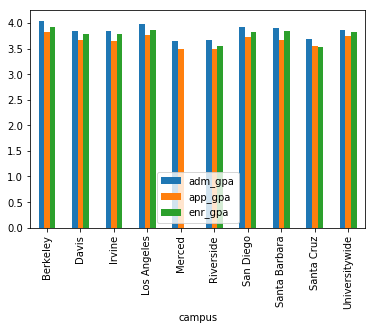

In [11]:
def avg_gpa_finder(data):
    d = {}
    d['adm_gpa'] = (data['adm_gpa'] * data['adm_num']).sum() / (data[data['adm_gpa'].notnull()]['adm_num'].sum())
    d['app_gpa'] = (data['app_gpa'] * data['app_num']).sum() / (data[data['app_gpa'].notnull()]['app_num'].sum())
    d['enr_gpa'] = (data['enr_gpa'] * data['enr_num']).sum() / (data[data['enr_gpa'].notnull()]['enr_num'].sum())
    return pd.Series(d, index=['adm_gpa', 'app_gpa', 'enr_gpa'])

packed.groupby(['campus']).apply(avg_gpa_finder).plot.bar()

### Average Admitted GPA Inflation over the years

We are interested in exploring how the average admitted, enrolled and applied GPAs have changed over the years. The line plots describe the trend, in which the GPA tends to increase before 2007 and suddenly drops afterwards. After 2010, the increasing trend of GPAs goes on. So, during recent years, GPA does get inflated. This suggests to us that, in order to predict the ratio between the applicants and the students who were actually enrolled, we might need to look at data in recent years. 

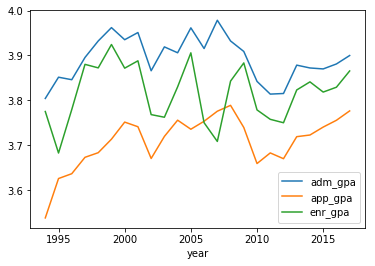

In [12]:
packed.groupby(['year']).apply(avg_gpa_finder).plot.line()

### Admitted Students vs Enrolled Students 

The goal of this project is to predict the ratio between the enrolled students and the admitted students in the future. Therefore, a scatterplot between the enrolled and the admitted from the past would give us an indication of how our model needs to be built. The data regarding "Universitywide" is excluded from this plot because we are interested in each individual university.

The ratio of enrolled to admitted could be a good metric for the desirability of a campus. For instance, Berkely and Santa Barbara admitted a similar amount of students, but many more students enrolled at Berkely, indicating that Berkely could be more desirable for students.

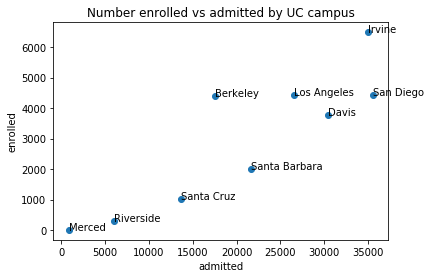

In [17]:
def adm_enr_num(data):
    d = {}
    d['adm_num'] = data['adm_num'].sum()
    d['enr_num'] = data['enr_num'].sum()
    return pd.Series(d, index=['adm_num', 'enr_num'])

enr_adm_num_c = packed[packed['campus'] != 'Universitywide'].groupby(['campus']).apply(adm_enr_num)

x, y = enr_adm_num_c.adm_num, enr_adm_num_c.enr_num # should exclude the Universitywide data
campus_names = ['Berkeley', 'Irvine', 'Davis', 'Los Angeles', 'Merced', 'Riverside', 'San Diego',
               'Santa Barbara', 'Santa Cruz']
campus_names.sort()

plt.scatter(x, y)
plt.xlabel('admitted')
plt.ylabel('enrolled')
plt.title('Number enrolled vs admitted by UC campus')

for i in range(0, len(campus_names)):
    plt.annotate(campus_names[i], (x[i], y[i]))